In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Algorithm basedd missing values imputation - consider the impact of the vairibale on the missing value and impute accordingly 
# MICE - Multivariate imputation using chained equation is the most populat algorihtm

# Imputes both numeirc and non numeric object/categorical missing values. 
# intitally imputed with mean, median or mode and chaned equations are built
# chained equations wherein the missing value column/variable is treated as dependent variables and relevant 
# classification/regression model is built and prediction done.

# Missing value will be replaced with predicted value.

# [MICE algorithm uses a step-by-step approach to predict missing values by creating models for each variable and iteratively 
#  filling in the missing data. By doing this multiple times, it provides a more robust estimation of the missing values 
#  and allows for more reliable statistical analysis.]

In [9]:
train = pd.read_csv('training_set_features.csv')

In [10]:
trainset = pd.read_csv('training_set_labels.csv')

In [11]:
testf = pd.read_csv('test_set_features.csv')

In [12]:
train.shape

(26707, 36)

In [14]:
trainset.shape

(26707, 3)

In [16]:
testf.shape

(26708, 36)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [19]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [20]:
testf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [26]:
trainset.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [38]:
train.isnull().sum()*100/[26707]

respondent_id                   0.000000
h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race            

In [33]:
train.employment_industry.value_counts(dropna=False)

NaN         13330
fcxhlnwr     2468
wxleyezf     1804
ldnlellj     1231
pxcmvdjn     1037
atmlpfrs      926
arjwrbjb      871
xicduogh      851
mfikgejo      614
vjjrobsf      527
rucpziij      523
xqicxuve      511
saaquncn      338
cfqqtusy      325
nduyfdeo      286
mcubkhph      275
wlfvacwt      215
dotnnunm      201
haxffmxo      148
msuufmds      124
phxvnwax       89
qnlwzans       13
Name: employment_industry, dtype: int64

In [39]:
combinedf = pd.concat([train,testf],axis = 0)

In [40]:
combinedf.shape

(53415, 36)

In [45]:
combinedf.isnull().sum().sort_values(ascending=False)*100/len(combinedf)

employment_occupation          50.352897
employment_industry            49.808106
health_insurance               45.871010
income_poverty                 16.699429
doctor_recc_h1n1                8.087616
doctor_recc_seasonal            8.087616
rent_or_own                     7.634560
employment_status               5.492839
marital_status                  5.335580
education                       5.268183
chronic_med_condition           3.562670
child_under_6_months            3.057194
health_worker                   2.982308
opinion_seas_sick_from_vacc     1.980717
opinion_seas_risk               1.896471
opinion_seas_vacc_effective     1.711130
opinion_h1n1_vacc_effective     1.477113
opinion_h1n1_sick_from_vacc     1.441543
opinion_h1n1_risk               1.437798
household_children              0.887391
household_adults                0.887391
behavioral_avoidance            0.788168
behavioral_touch_face           0.479266
h1n1_knowledge                  0.445568
h1n1_concern    

In [48]:
combinedf = combinedf.drop('respondent_id',axis=1)

In [49]:
# for using iterator imputer in sklearn which is experimental as of now
# 1) remove varibales or columns not needed
# 2) Labelencode all object and categorical data but retain the Missing value as it is.


combinedf.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
le = LabelEncoder()

In [52]:
original = combinedf

In [53]:
mask = combinedf.isnull()

In [54]:
combinedf = combinedf.astype(str).apply(le.fit_transform)

In [55]:
combinedf = combinedf.where(~mask,original)

In [58]:
combinedf.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,2,0,1,1,0,1,3,1,3,0,2,1,0,1,8,2,0,0,NaN,NaN
1,3,2,0,1,0,1,0,1,1,0,0,0,0,0,1,4,3,3,3,1,3,1,0,3,1,2,1,1,0,1,0,0,0,13,20
2,1,1,0,1,0,0,0,0,0,NaN,NaN,1,0,0,NaN,2,0,0,3,0,1,0,2,3,1,0,1,0,0,9,0,2,0,15,22
3,1,1,0,1,0,1,1,0,0,0,1,1,0,0,NaN,2,2,4,4,3,0,4,0,3,0,2,1,1,1,5,1,0,0,NaN,NaN
4,2,1,0,1,0,1,1,0,1,0,0,0,0,0,NaN,2,2,1,2,0,3,2,3,3,0,0,0,0,0,9,0,1,0,19,5


In [59]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier

In [60]:
imputer = IterativeImputer(estimator=DecisionTreeClassifier(), 
                           initial_strategy="most_frequent",
                           max_iter=20)

In [61]:
combinedf_impute = imputer.fit_transform(combinedf)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [64]:
combinedf_impute = pd.DataFrame(combinedf_impute,columns=combinedf.columns)

In [66]:
combinedf_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 53415 non-null  float64
 1   h1n1_knowledge               53415 non-null  float64
 2   behavioral_antiviral_meds    53415 non-null  float64
 3   behavioral_avoidance         53415 non-null  float64
 4   behavioral_face_mask         53415 non-null  float64
 5   behavioral_wash_hands        53415 non-null  float64
 6   behavioral_large_gatherings  53415 non-null  float64
 7   behavioral_outside_home      53415 non-null  float64
 8   behavioral_touch_face        53415 non-null  float64
 9   doctor_recc_h1n1             53415 non-null  float64
 10  doctor_recc_seasonal         53415 non-null  float64
 11  chronic_med_condition        53415 non-null  float64
 12  child_under_6_months         53415 non-null  float64
 13  health_worker   

In [125]:
# Split data back to train & test

flu_train = combinedf_impute.loc[0:26706]

In [126]:
flu_test  = combinedf_impute.loc[26707:53414]

In [127]:
print(flu_train.shape)
print(train.shape)
print(flu_test.shape)
print(testf.shape)

(26707, 35)
(26707, 36)
(26708, 35)
(26708, 36)


In [128]:
y = trainset.seasonal_vaccine
X = flu_train

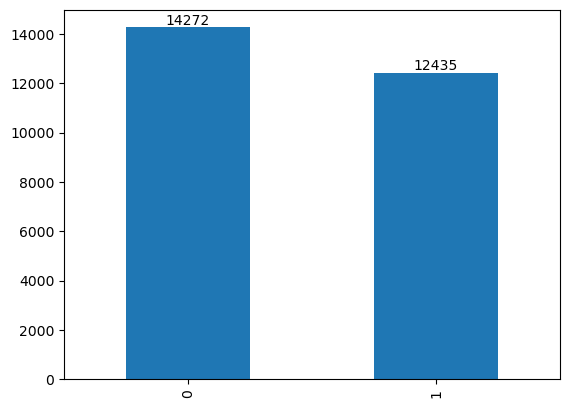

In [129]:
ax = y.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

In [130]:
# Binary logistic Regression - score, predict, classification_report, ROC Curve
# Decision Tree
# Random Forest
# Gradient boosting
# Naive Bayes
# SVM

In [131]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

In [132]:
lr = LogisticRegression(max_iter=2000)

In [133]:
lrmodel = lr.fit(X,y)

In [134]:
lrmodel.score(X,y)

0.7715580184970232

In [135]:
from sklearn.model_selection import cross_val_score

In [136]:
cross_val_score(lr,X,y)

array([0.76675402, 0.76843879, 0.77494851, 0.7755102 , 0.76895712])

In [138]:
np.mean([0.76675402, 0.76843879, 0.77494851, 0.7755102 , 0.76895712])

0.770921728

In [139]:
lr_train_predict = lrmodel.predict(X)

In [140]:
lrpred = pd.DataFrame(lr_train_predict)

In [141]:
lrpred.value_counts()

0    14831
1    11876
dtype: int64

In [142]:
from sklearn.metrics import RocCurveDisplay,classification_report

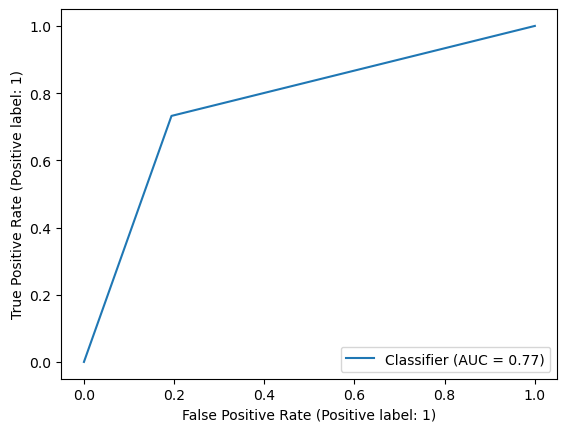

In [143]:
RocCurveDisplay.from_predictions(y,lr_train_predict)

In [144]:
print(classification_report(y,lrpred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79     14272
           1       0.77      0.73      0.75     12435

    accuracy                           0.77     26707
   macro avg       0.77      0.77      0.77     26707
weighted avg       0.77      0.77      0.77     26707



In [145]:
from sklearn.tree import DecisionTreeClassifier

In [154]:
tree = DecisionTreeClassifier(max_depth=10)

In [155]:
treemodel = tree.fit(X,y)

In [156]:
treemodel.score(X,y)

0.8110233272175834

In [157]:
cross_val_score(tree,X,y)

array([0.73886185, 0.74634968, 0.74705111, 0.75098296, 0.75117019])

In [158]:
np.mean([0.73886185, 0.74634968, 0.74705111, 0.75098296, 0.75117019])

0.7468831579999999

In [159]:
dr_train_predict = treemodel.predict(X)

In [160]:
drpred = pd.DataFrame(dr_train_predict)

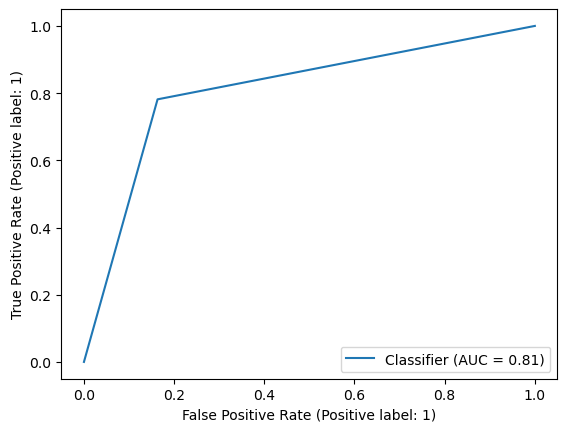

In [162]:
RocCurveDisplay.from_predictions(y,dr_train_predict)

In [163]:
print(classification_report(y,drpred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83     14272
           1       0.81      0.78      0.79     12435

    accuracy                           0.81     26707
   macro avg       0.81      0.81      0.81     26707
weighted avg       0.81      0.81      0.81     26707



In [165]:
# Random forest

from sklearn.ensemble import RandomForestClassifier

In [174]:
RF = RandomForestClassifier(n_estimators=1000,max_depth=12)

In [175]:
RFmodel = RF.fit(X,y)

In [176]:
RFmodel.score(X,y)

0.8685363387875837

In [177]:
cross_val_score(RF,X,y)

array([0.77368027, 0.77723699, 0.77719528, 0.77925482, 0.77738251])

In [178]:
np.mean([0.77368027, 0.77723699, 0.77719528, 0.77925482, 0.77738251])

0.7769499739999999

In [179]:
RF_train_pred = RFmodel.predict(X)

In [172]:
rfpred = pd.DataFrame(RF_train_pred)

In [181]:
print(classification_report(y,rfpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14272
           1       1.00      1.00      1.00     12435

    accuracy                           1.00     26707
   macro avg       1.00      1.00      1.00     26707
weighted avg       1.00      1.00      1.00     26707



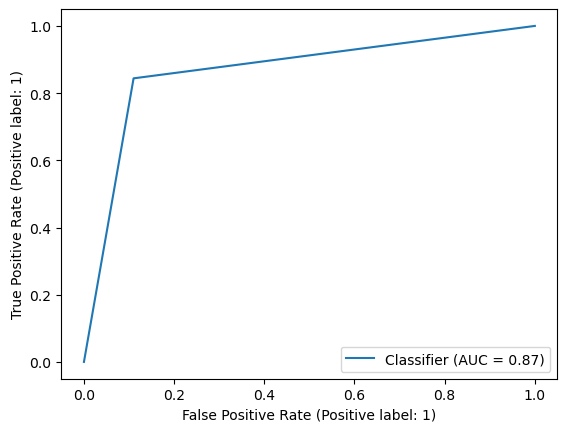

In [180]:
RocCurveDisplay.from_predictions(y,RF_train_pred)

In [183]:
from sklearn.ensemble import GradientBoostingClassifier

In [184]:
GB = GradientBoostingClassifier(n_estimators=1000)

In [185]:
GBmodel = GB.fit(X,y)

In [186]:
GBmodel.score(X,y)

0.8129329389298686

In [188]:
Gb_train_pred = GBmodel.predict(X)

In [189]:
pd.crosstab(y,Gb_train_pred)

col_0,0,1
seasonal_vaccine,,
0,11866,2406
1,2590,9845


In [190]:
print(classification_report(y,Gb_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83     14272
           1       0.80      0.79      0.80     12435

    accuracy                           0.81     26707
   macro avg       0.81      0.81      0.81     26707
weighted avg       0.81      0.81      0.81     26707



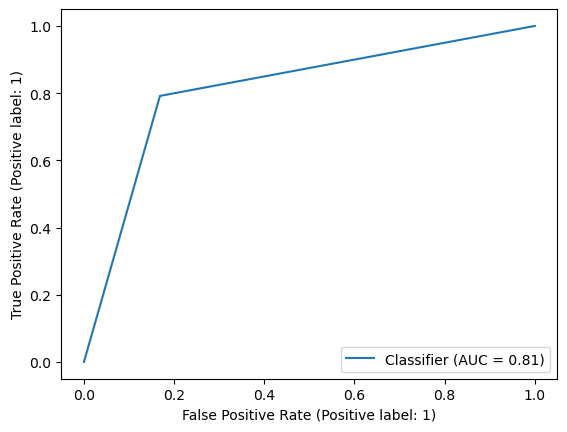

In [191]:
RocCurveDisplay.from_predictions(y,Gb_train_pred)

In [192]:
from sklearn.naive_bayes import CategoricalNB

In [193]:
nb = CategoricalNB()

In [194]:
nbmodel = nb.fit(X,y)

In [195]:
nbmodel.score(X,y)

0.7526491182087093

In [196]:
nbpredict = nbmodel.predict(X)

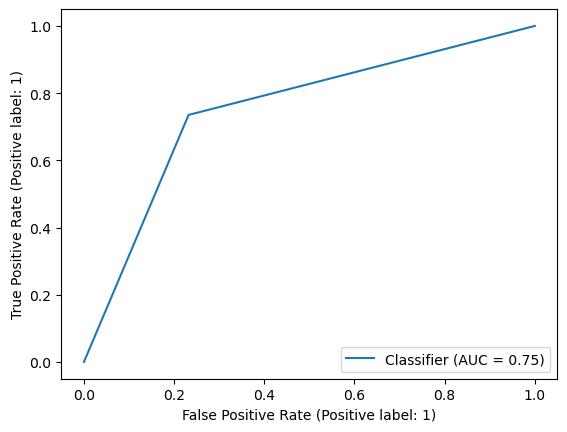

In [197]:
RocCurveDisplay.from_predictions(y,nbpredict)

In [198]:
from sklearn.svm import SVC

In [200]:
svm = SVC()

In [201]:
svmmodel = svm.fit(X,y)

In [202]:
svmmodel.score(X,y)

0.7782229378065676

In [203]:
svmppredict = svmmodel.predict(X)

In [205]:
print(classification_report(y,svmppredict))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80     14272
           1       0.78      0.74      0.76     12435

    accuracy                           0.78     26707
   macro avg       0.78      0.78      0.78     26707
weighted avg       0.78      0.78      0.78     26707



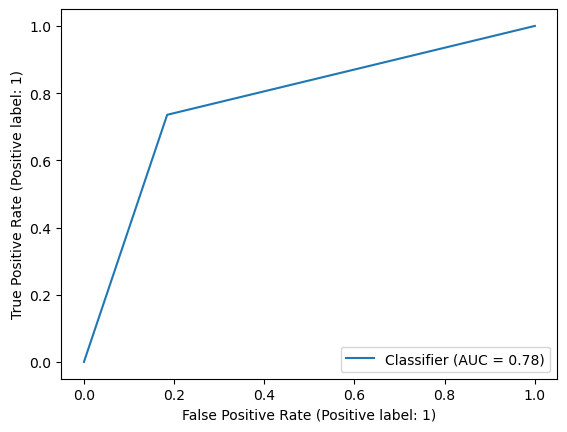

In [204]:
RocCurveDisplay.from_predictions(y,svmppredict)

In [206]:
!pip install auto-sklearn

  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [17 lines of output]
  Traceback (most recent call last):
    File "C:\Users\Hp\anaconda3\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\Hp\anaconda3\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
    File "C:\Users\Hp\anaconda3\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
      return hook(config_settings)
    File "C:\Users\Hp\AppData\Local\Temp\pip-build-env-3zt8u24q\overlay\Lib\site-packages\setuptools\build_meta.py", line 341, in get_requires_for_build_wheel
      return self._get_build_requires(config_settings, requirements=['wheel'])
    File "C:\Users\Hp\AppData\Local\Temp\pip-build-env-3zt8u24q\over


                                              0.0/6.5 MB ? eta -:--:--
                                              0.0/6.5 MB 660.6 kB/s eta 0:00:10
                                              0.0/6.5 MB 660.6 kB/s eta 0:00:10
                                              0.0/6.5 MB 660.6 kB/s eta 0:00:10
                                              0.0/6.5 MB 660.6 kB/s eta 0:00:10
                                              0.1/6.5 MB 386.4 kB/s eta 0:00:17
                                              0.1/6.5 MB 386.4 kB/s eta 0:00:17
                                              0.1/6.5 MB 386.4 kB/s eta 0:00:17
     -                                        0.2/6.5 MB 393.8 kB/s eta 0:00:16
     -                                        0.2/6.5 MB 402.0 kB/s eta 0:00:16
     -                                        0.2/6.5 MB 402.0 kB/s eta 0:00:16
     -                                        0.2/6.5 MB 402.0 kB/s eta 0:00:16
     -                                        0.